In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from scipy.stats.mstats import winsorize

import autokeras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ABCD_ML as ML
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


We begin by simply loading in the dataset, it is unprocessed destr. structural data, along with the Cognition Fluid Composite Uncorrected Standard Score.

In [2]:
data = pd.read_csv('Data/Raw_Cognition_data.csv')

We want to ensure that the target variable does not contain any horrendeous outliers.

44.0 131.0


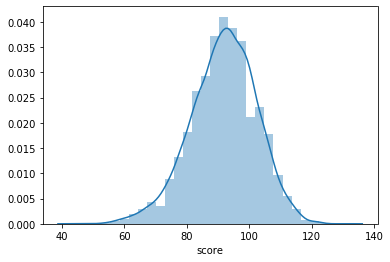

In [3]:
print(np.min(data.score), np.max(data.score))
sns.distplot(data.score, bins=30)
plt.show()

In [4]:
X = np.array(data.drop('score', axis=1))
y = np.array(data.score)
print(np.shape(X), np.shape(y))

(9925, 1275) (9925,)


In [5]:
X = X.astype(np.float32)
y = y.astype(np.float32)

In [6]:
scaler = StandardScaler()
y = scaler.fit_transform(y.reshape(-1, 1))
y = y.squeeze()

In [7]:
X = winsorize(X, (.02), axis=0).data

Preform the train, test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7443, 1275), (2482, 1275), (7443,), (2482,))

Would next want to consider any windsorizing, or log/box cox transform for dealing with skewed features

Next the different options for scaling

In [9]:
#For now just
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)